In this assignment you will analyze the cereal dataset. 

*Eat too much sugary cereal? Ruin your appetite with this dataset!*

Jokes apart, this dataset contains the analysis of different types of cereals, along with their ratings according to consumers. 

Your assignment is to produce a report of the analysis for this dataset, following the guidelines below.

#### Content of the dataset

**Fields in the dataset:**

- Name: Name of cereal
- mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
- type:
cold
hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)


## 1) Import the data

In [717]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cereal.csv')

# 2) (Minimal) cleaning 

In [718]:
#Check if there are missing or nonsensical values. -1 is likely used instead of N/A
#-1 values in columns found after a brief look at the dataset. Obviously this is not possible with very large datasets.
print(df.isnull().sum())
print(f'The number of -1 values in potass: {(df["potass"]==-1).sum()}')
print(f'The number of -1 values in potass: {(df["carbo"]==-1).sum()}')
print(f'The number of -1 values in potass: {(df["sugars"]==-1).sum()}')

df[['potass', 'carbo', 'sugars']] = df[['potass', 'carbo', 'sugars']].replace(-1,0)
nameDic = {'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs', 'N':'Nabisco', 'P':'Post', 'Q':'Quaker Oats', 'R': 'Ralston Purina'}
df.index = df.iloc[:,1]
df.rename(nameDic, axis = 'index', inplace = True)
df.drop('mfr', axis = 1, inplace = True)
df.head()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64
The number of -1 values in potass: 2
The number of -1 values in potass: 1
The number of -1 values in potass: 1


,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
Nabisco,100% Bran,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
Quaker Oats,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
Kelloggs,All-Bran,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
Kelloggs,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Ralston Purina,Almond Delight,C,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843


# 3) Exploratory analysis

[1, 22, 23, 6, 9, 8, 8]


<AxesSubplot:xlabel='sugars', ylabel='rating'>

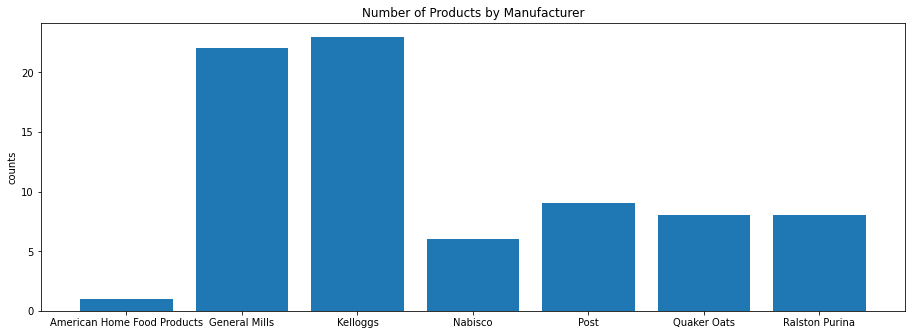

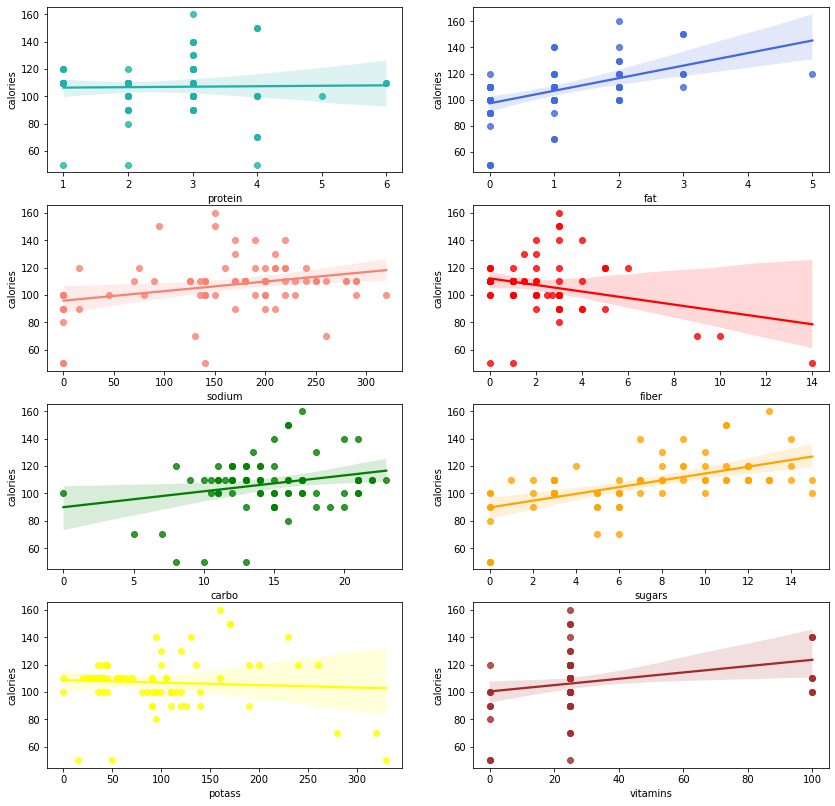

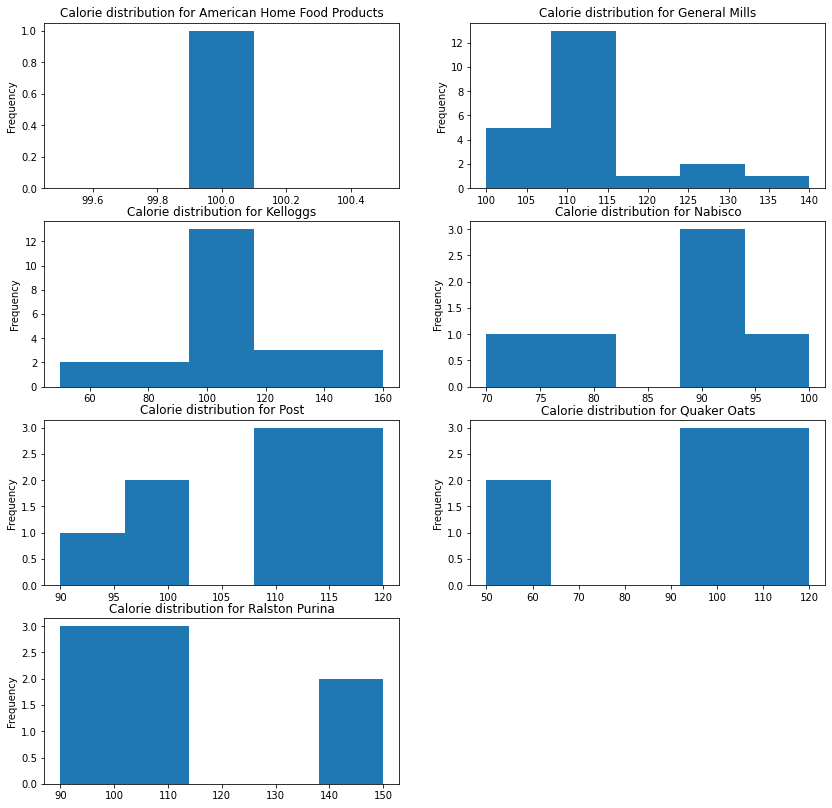

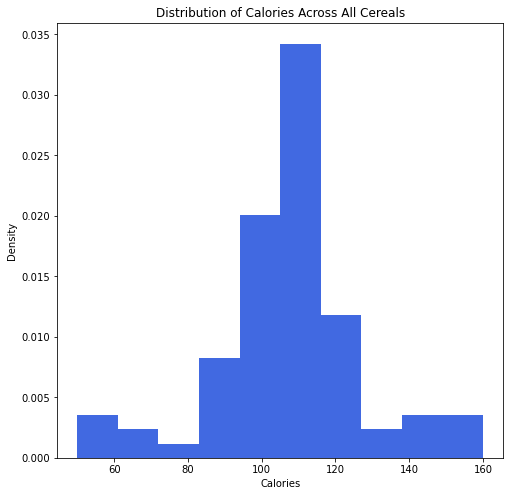

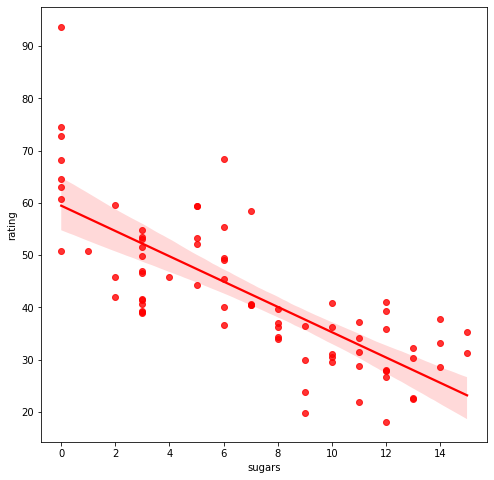

In [719]:

#1. Manufacturers
fig = plt.figure(figsize = [12,4])
ax = fig.add_axes([0,0,1,1])
counts = [df.loc[[manufacturer]]['name'].count() for manufacturer in nameDic.values()]
print(counts)
ax.bar(nameDic.values(), counts)
plt.title('Number of Products by Manufacturer')
plt.ylabel('counts')

#2. Relationship of calories with other variables
fig2, saxis = plt.subplots(4, 2,figsize=(14,14))
sns.regplot(x = 'protein', y = 'calories', data=df, ax = saxis[0,0],color='lightseagreen')
sns.regplot(x = 'fat', y = 'calories', data=df, ax = saxis[0,1],color='royalblue')
sns.regplot(x = 'sodium', y = 'calories', data=df, ax = saxis[1,0],color='salmon')
sns.regplot(x = 'fiber', y = 'calories', data=df, ax = saxis[1,1],color='red')
sns.regplot(x = 'carbo', y = 'calories', data=df, ax = saxis[2,0], color='green')
sns.regplot(x = 'sugars', y = 'calories', data=df, ax = saxis[2,1], color='orange')
sns.regplot(x = 'potass', y = 'calories', data=df, ax = saxis[3,0], color='yellow')
sns.regplot(x = 'vitamins', y = 'calories', data=df, ax = saxis[3,1], color='brown')

#3. Distribution of calories by manufacturer
plt.figure(figsize = [14,14])
c = 421
for manufacturer in nameDic.values():
    plt.subplot(c)
    plt.hist(df.loc[[manufacturer]]['calories'], bins = 5)
    plt.ylabel('Frequency')
    plt.title(f'Calorie distribution for {manufacturer}')
    c += 1

#4. Distribution of calories across all cereals
plt.figure(figsize = (8,8))
plt.hist(df['calories'], bins = 10, color ='royalblue', density = True)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.title('Distribution of Calories Across All Cereals')

#5 Do cereals with higher sugar content get higher ratings? 
plt.figure(figsize = (8,8))
sns.regplot(x = 'sugars', y = 'rating', data = df, color = 'red')

# 4) Multicollinearity

Compute and plot a collinearity matrix (considering, of course, only the quantitative variables in your dataset). Are there variables with a high collinearity? Could you explain it?

name         object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


<AxesSubplot:>

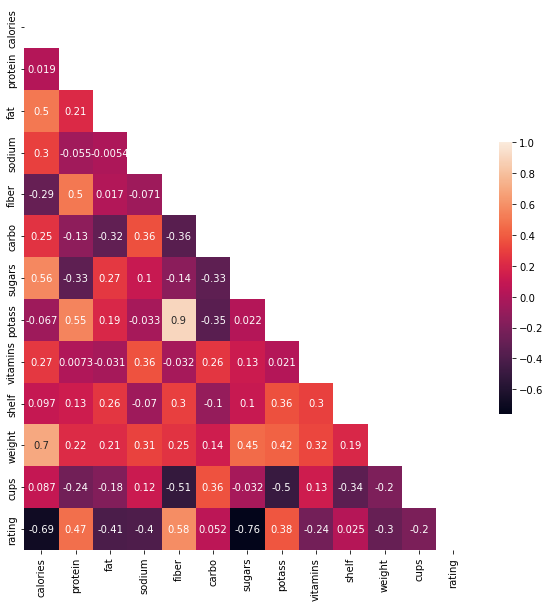

In [650]:
print(df.dtypes)
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 0:].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1, annot=True , cbar_kws={"shrink": .5},  mask=mask)



# 5) Regression

Test error for full linear model:
RMSE: calories    0.195068
dtype: float64
R2  : 0.9999525087124819
Training error for full linear model:
RMSE: calories    0.072249
dtype: float64
R2  : 0.9999926413599189
                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.869e+05
Date:                Sat, 14 May 2022   Prob (F-statistic):           4.31e-76
Time:                        15:39:18   Log-Likelihood:                 55.600
No. Observations:                  46   AIC:                            -85.20
Df Residuals:                      33   BIC:                            -61.43
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
    

/Users/roylehmann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


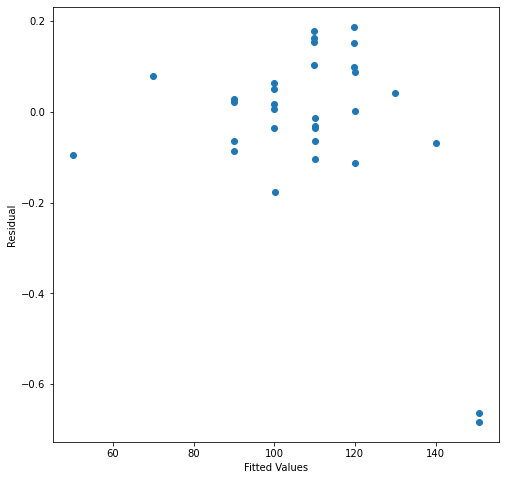

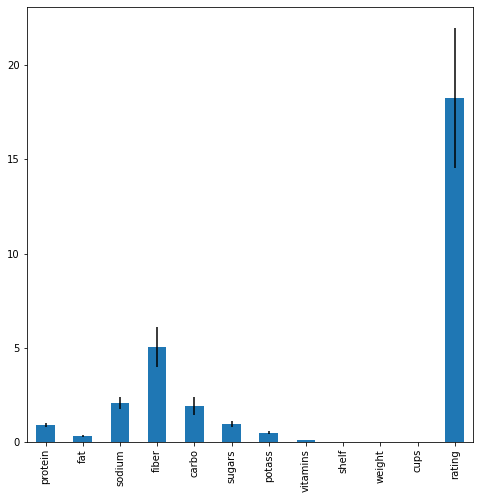

/Users/roylehmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/roylehmann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Selected features: ['protein', 'fat', 'fiber', 'carbo', 'sugars', 'weight']
                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.16e-23
Time:                        15:39:18   Log-Likelihood:                -131.77
No. Observations:                  46   AIC:                             277.5
Df Residuals:                      39   BIC:                             290.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

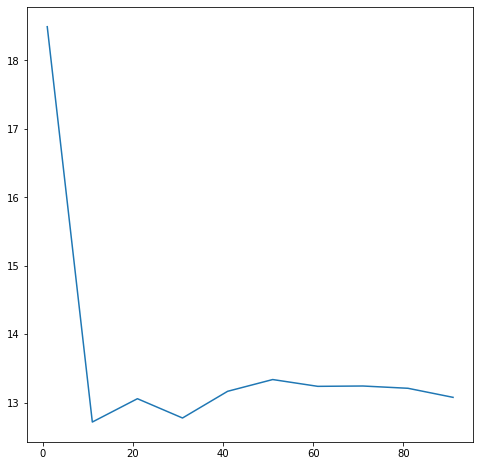

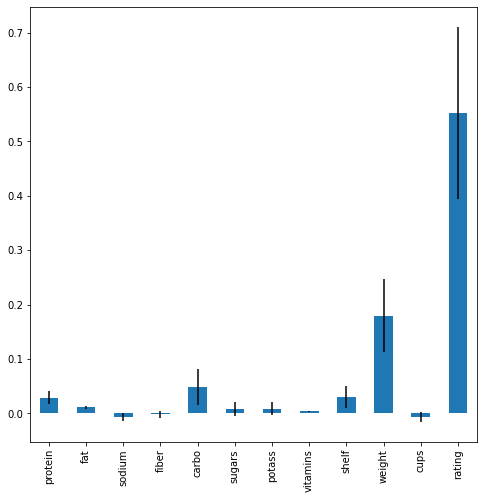

Test error for full random forest model: 
RMSE: 24.76377469088036
R2  : 0.7588302686525996
Training error for full random forest model: 
RMSE: 24.851696225670505
R2  : 0.9715225658398484
Selected features: ['protein', 'fiber', 'carbo', 'potass', 'weight', 'rating']


/Users/roylehmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Test error for selected random forest model:
RMSE: 25.36391166203271
R2  : 0.7508179282139986
Training error for selected random forest model:
RMSE: 24.837474227947265
R2  : 0.9820955446870079
Test Error for decision tree:
RMSE: calories    15.929896
dtype: float64
R2  : 0.605462410186416
Training Error for decision tree:
RMSE: calories    2.140623
dtype: float64
R2  : 0.9935192541763969


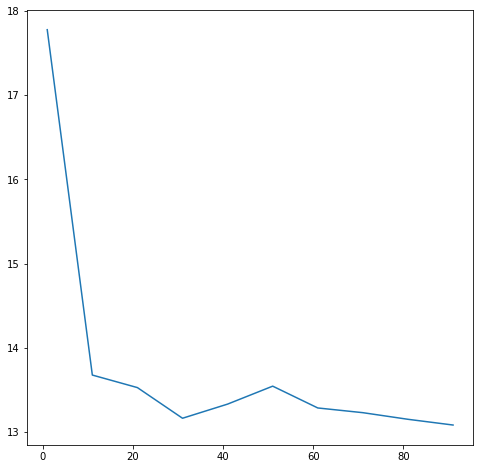

In [751]:
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn import tree

# Loss Function
def RMSE(actual, predicted):
    error = actual-predicted
    error_squared = np.square(error)
    RMSE = np.sqrt(np.mean(error_squared))
    return(RMSE)


#Defining the dependent and independent variables
X = df.select_dtypes(include = ['float64', 'int64'])
del X['calories']
y = df.iloc[:,df.columns == 'calories']

# Splitting into test and train data. Creating a third validation set not feasible because dataset is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

# Linear regression
linearModel = linearRegression.fit(X_train, y_train)
y_pred_test = linearRegression.predict(X_test)
y_pred_train = linearRegression.predict(X_train)

# Test error (full model)
print('Test error for full linear model:')
print('RMSE: {}'.format(RMSE(y_test, y_pred_test)))
print('R2  : {}'.format(np.sqrt(r2_score((y_test),(y_pred_test)))))

# Training error (full model)
print('Training error for full linear model:')
print('RMSE: {}'.format(RMSE(y_train, y_pred_train)))
print('R2  : {}'.format(np.sqrt(r2_score((y_train),(y_pred_train)))))

#Check residuals versus predicted
pred = linearModel.predict(X_test)
resid = y_test - pred
plt.figure(figsize = (8,8))
plt.scatter(pred, resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

# Obtain coefficients with p-values and R-square of full linear model
X_const = sm.add_constant(X_train)
OLS = sm.OLS(y_train, X_const)
est = OLS.fit()
print(est.summary())

#Feature importances using permutations on full model
importances = permutation_importance(linearModel, X_test, y_test, n_repeats=15, random_state=42, n_jobs=2)
OLS_importances = pd.Series(importances.importances_mean, index=X_train.columns)
fig, ax = plt.subplots(figsize = [8,8])
OLS_importances.plot.bar(yerr=importances.importances_std, ax=ax)
plt.show()

#Model selection
DESIRED_FEATURES = 6

rfe = RFE(linearModel, DESIRED_FEATURES)
rfe = rfe.fit(X_train, y_train)
X_trainNew = X_train[X_train.columns[rfe.support_]]
X_testNew = X_test[X_test.columns[rfe.support_]]
print('Selected features: %s' % list(X_train.columns[rfe.support_]))

#Fit the new model
selectedLinearModel = linearRegression.fit(X_trainNew, y_train)

#Obtain coefficients with p-values of new model
XNew_const = sm.add_constant(X_trainNew)
OLS = sm.OLS(y_train, XNew_const)
est = OLS.fit()
print(est.summary())

# Get test and train predictions 
y_pred_test = linearRegression.predict(X_testNew)
y_pred_train = linearRegression.predict(X_trainNew)

# Test error
print('Test error for selected linear model:')
print('RMSE: {}'.format(RMSE(y_test, y_pred_test)))
print('R2  : {}'.format(np.sqrt(r2_score((y_test),(y_pred_test)))))

# Training error
print('Training error for selected linear model:')
print('RMSE: {}'.format(RMSE(y_train, y_pred_train)))
print('R2  : {}'.format(np.sqrt(r2_score((y_train),(y_pred_train)))))


# --Random forest--
#Instantiate random forest with size 100
TREES = 100
rf = RandomForestRegressor(n_estimators = TREES, random_state = 42)
rf = rf.fit(X_train, y_train.values.ravel())

#Optimal forest size for full model
count = 1
MSErf = []
n_trees = []
while count < TREES:
    rf = RandomForestRegressor(n_estimators = count, random_state = 42)
    rf.fit(X_train, y_train.values.ravel())
    y_pred_test = rf.predict(X_test).reshape((-1,1))
    MSErf.append(RMSE(y_test, y_pred_test))
    n_trees.append(count)
    count += 10
plt.figure(figsize=[8,8])
plt.plot(n_trees, MSErf)

# Optimal size = 10
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf = rf.fit(X_train, y_train.values.ravel())

#Importance variables for random forest (full model) 

print('Importance variable for full random forest model:')
importances = permutation_importance(rf, X_test, y_test, n_repeats=15, random_state=42, n_jobs=2)
forest_importances = pd.Series(importances.importances_mean, index=X_train.columns)
fig2, ax2 = plt.subplots(figsize = [8,8])
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax2)
plt.show()

#Test and train predictions of full random forest model
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Test error for full random forest model: ")
print("RMSE: {}".format(RMSE(y_test.values, y_pred_test)))
print("R2  : {}".format(np.sqrt(r2_score(y_test.values, y_pred_test))))

#Train error
print("Training error for full random forest model: ")
print("RMSE: {}".format(RMSE(y_train.values, y_pred_train)))
print("R2  : {}".format(np.sqrt(r2_score(y_train.values, y_pred_train))))


#Desired features using recursive feature elimination 
rfe = RFE(rf, DESIRED_FEATURES)
rfe = rfe.fit(X_train, y_train.values.ravel())
X_trainNEW = X_train[X_train.columns[rfe.support_]]
X_testNEW = X_test[X_test.columns[rfe.support_]]
print('Selected features: %s' % list(X_train.columns[rfe.support_]))

#Optimal forest size selected model
count = 1
MSErf = []
n_trees = []
while count < TREES:
    rf = RandomForestRegressor(n_estimators = count, random_state = 42)
    rf.fit(X_trainNEW, y_train.values.ravel())
    y_pred_test = rf.predict(X_testNEW).reshape((-1,1))
    MSErf.append(RMSE(y_test, y_pred_test))
    n_trees.append(count)
    count += 10
plt.figure(figsize=[8,8])
plt.plot(n_trees, MSErf)

#Create random forest with an optimal number of trees of 30
TREES = 30
rf = RandomForestRegressor(n_estimators = TREES, random_state = 42)
rf.fit(X_trainNEW, y_train.values.ravel())

#Test and train predictions of random forest
y_pred_train = rf.predict(X_trainNEW)
y_pred_test = rf.predict(X_testNEW)

#Test error
print("Test error for selected random forest model:")
print("RMSE: {}".format(RMSE(y_test.values, y_pred_test)))
print("R2  : {}".format(np.sqrt(r2_score(y_test.values, y_pred_test))))

#Train error
print("Training error for selected random forest model:")
print("RMSE: {}".format(RMSE(y_train.values, y_pred_train)))
print("R2  : {}".format(np.sqrt(r2_score(y_train.values, y_pred_train))))

# --Decision Tree Regressor--
cerealTree = tree.DecisionTreeRegressor()
cerealTree = cerealTree.fit(X_train, y_train)
depth = cerealTree.get_depth()

y_pred_train = pruned.predict(X_train).reshape(-1,1)
y_pred_test = pruned.predict(X_test).reshape(-1,1)

# Test Error
print("Test Error for decision tree:")
print("RMSE: {}".format(RMSE(y_test, y_pred_test)))
print("R2  : {}".format(np.sqrt(r2_score((y_test.values),(y_pred_test)))))

# Training Error
print("Training Error for decision tree:")
print("RMSE: {}".format(RMSE(y_train, y_pred_train)))
print("R2  : {}".format(np.sqrt(r2_score(y_train, y_pred_train))))



# 6) Classification

In [752]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
Nabisco,100% Bran,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
Quaker Oats,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
Kelloggs,All-Bran,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
Kelloggs,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Ralston Purina,Almond Delight,C,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843


/var/folders/pk/cppscjc92cv75f4y5kz4rv_h0000gn/T/ipykernel_84788/1751847326.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


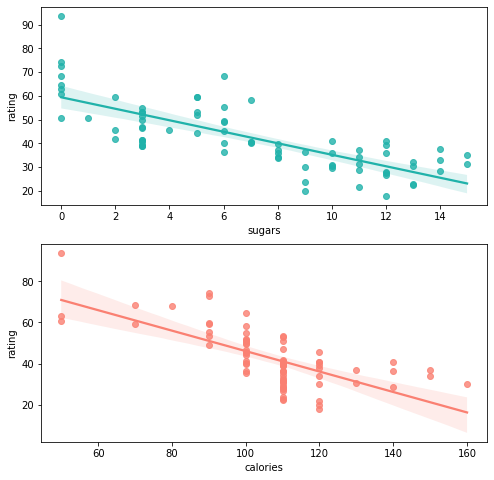

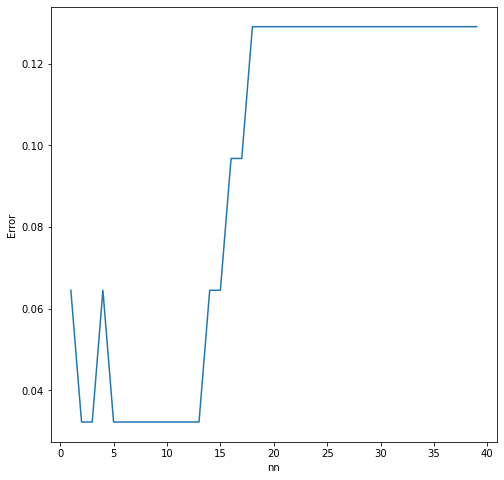

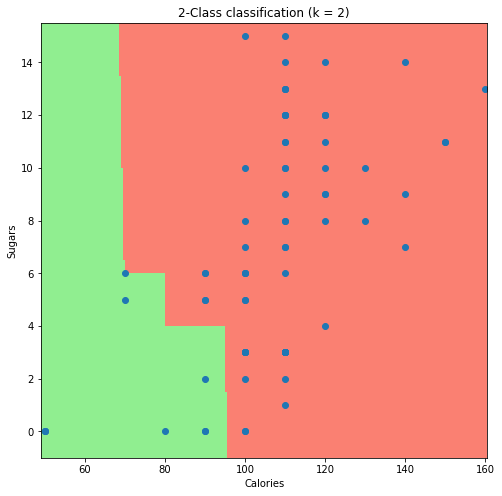

Train/Test split results - KNN MODEL:
KNeighborsClassifier accuracy is 0.968
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  1.  0.  0.  0.  0.
 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0. ]


In [772]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# How is rating related to calories and sugar?
fig, axs = plt.subplots(2, figsize = (8,8))
sns.regplot(x = 'sugars', y = 'rating', data=df, ax = axs[0],color='lightseagreen')
sns.regplot(x = 'calories', y = 'rating', data=df, ax = axs[1],color='salmon')

# Create dummies
df['highly rated cereals'] = (df['rating'] > 55)
df['highly rated cereals'] = df['highly rated cereals'].replace({True:1, False:0})

# Classifier variables:
X = np.array(df.iloc[:,[2,8]]) # Classify along sugar and calories dimension
y = np.array(df['highly rated cereals'])

# Classifier accuracy with choice of nearest neighbors 
error = []
neighborhood = []
for nn in range(1, 40):
    knn = neighbors.KNeighborsClassifier(nn)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    error.append(1-accuracy_score(y_test, y_pred_class))
    neighborhood.append(nn)

plt.figure(figsize = (8,8))
plt.plot(neighborhood, error)
plt.xlabel('nn')
plt.ylabel('Error')

# Classifier with optimal choice of nn = 2
nn = 2
knnclassif = neighbors.KNeighborsClassifier(nn)
knnclassif.fit(X_train, y_train)
cmap_light = ListedColormap(["salmon", "lightgreen"])
cmap_bold = ['red', 'green']

h = 0.5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #Calorie dimensions
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #Sugars dimension

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

Z = knnclassif.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1],  cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (nn))
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.show()

#Errors
y_pred_rating = knnclassif.predict(X_test)
y_pred_probabilities = knnclassif.predict_proba(X_test)[:, 1]
print('Train/Test split results - KNN MODEL:')
print(knnclassif.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_rating))

print(y_pred_probabilities)


# 7) Unsupervised learning - Cluster analysis

In [773]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,highly rated cereals
mfr,,,,,,,,,,,,,,,,
Nabisco,100% Bran,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1
Quaker Oats,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
Kelloggs,All-Bran,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,1
Kelloggs,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,1
Ralston Purina,Almond Delight,C,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843,0


[3.39895994 2.31644087 1.66802399 1.02113059]


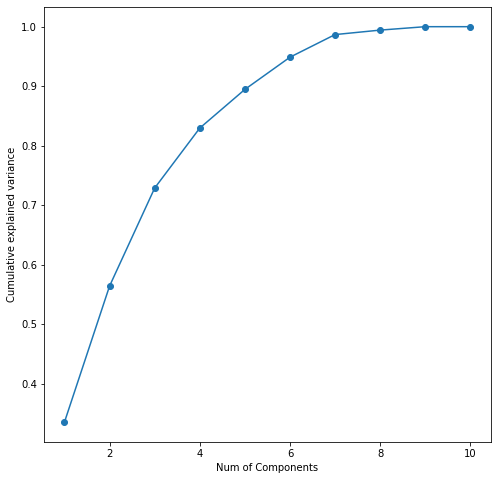

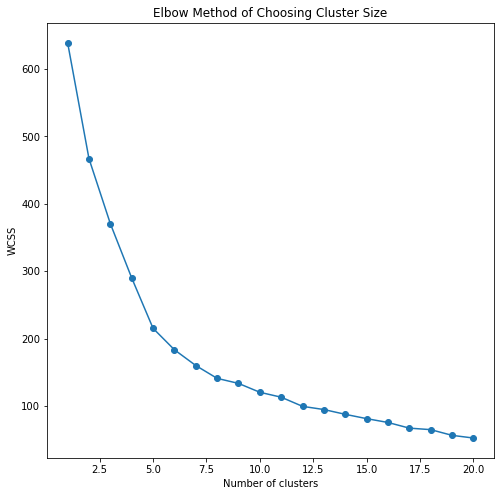

/Users/roylehmann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/roylehmann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


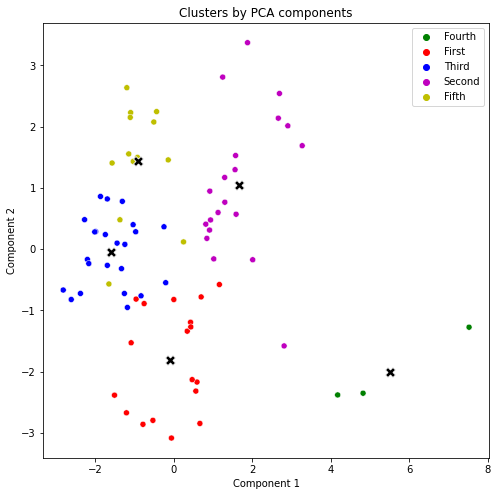

In [789]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -- KMeans with Dimensionality Reduction using PCA--

#Standardizing the quantitative variables
features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'rating']
X = df.loc[:, features].values
X = StandardScaler().fit_transform(X)

#Fit PCA and plot cumulative variance
pca = PCA().fit(X)
plt.figure(figsize = (8,8))
plt.plot(range(1,len(features) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Num of Components')
plt.ylabel('Cumulative explained variance')

# 4 components explain 80% of variance so I preserve 4 components
pca = PCA(n_components = 4)
pca.fit(X)
pca_scores = pca.transform(X)
print(pca.explained_variance_) # Eigenvectors

#Collect within-cluster sum of squares (WCSS)
wcss = []
MAX_CLUSTERS = 20
for i in range(1, MAX_CLUSTERS + 1):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (8,8))
plt.plot(range(1, MAX_CLUSTERS +1), wcss, marker = 'o')
plt.title('Elbow Method of Choosing Cluster Size')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Implied number of clusters = 5
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_pca.fit(pca_scores)

df_with_pca = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
df_with_pca.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_with_pca['Cluster Labels'] = kmeans_pca.labels_
df_with_pca['Cluster'] = df_with_pca['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'})

x = df_with_pca['Component 1']
y = df_with_pca['Component 2']
centroids = kmeans_pca.cluster_centers_[:,[0,1]]

plt.figure(figsize = (8,8))
sns.scatterplot(x, y, hue = df_with_pca['Cluster'], palette = ['g', 'r', 'b', 'm', 'y'])
sns.scatterplot(centroids[:,0], centroids[:,1], color = "black", marker = 'X', s = 100)
plt.title('Clusters by PCA components')
plt.show()


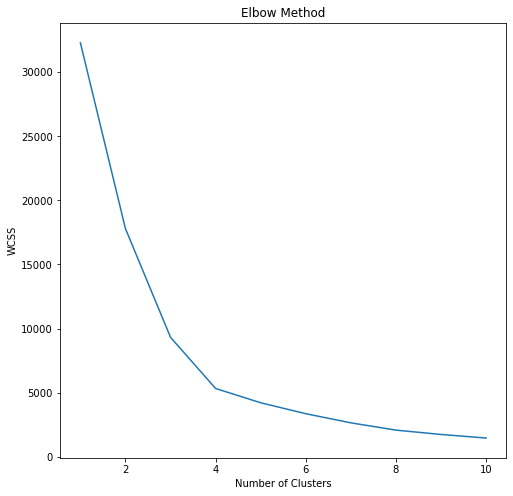

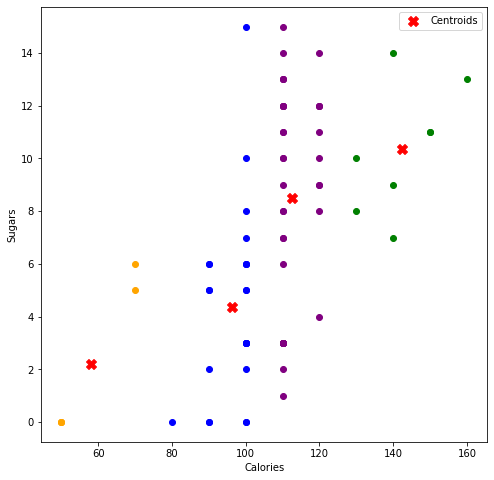

In [809]:
#KMeans clustering using pre-selected features

features = ['calories', 'protein', 'fat', 'fiber', 'carbo', 'sugars', 'weight'] 
wcss = []
MAX_CLUSTERS = 10
for i in range(1, MAX_CLUSTERS + 1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
    kmeans.fit(df.loc[:,features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,8))
plt.plot(range(1, MAX_CLUSTERS + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From elbow method: 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
y_kmeans = kmeans.fit_predict(df.loc[:,features])

plt.figure(figsize = (8,8))
plt.scatter(df.loc[y_kmeans == 0, 'calories'], df.loc[y_kmeans == 0, 'sugars'], c = 'purple')
plt.scatter(df.loc[y_kmeans == 1, 'calories'], df.loc[y_kmeans == 1, 'sugars'], c = 'orange')
plt.scatter(df.loc[y_kmeans == 2, 'calories'], df.loc[y_kmeans == 2, 'sugars'], c = 'green')
plt.scatter(df.loc[y_kmeans == 3, 'calories'], df.loc[y_kmeans == 3, 'sugars'], c = 'blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,5], s = 100, marker = 'X', c = 'red', label = 'Centroids')
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.legend()